In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")
pd.options.display.max_rows = 100

## Data structuring

#### Importing data.csv

In [2]:
root_dir = os.path.dirname(os.getcwd())
data_clean = pd.read_csv("{}/data/data_E3_100def.csv".format(root_dir))
data_clean

,subject_id,stimulus,trial_type,time_elapsed,gender,age,language,country,sampling,turkcode,...,responses,stim_type,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,instruction,causal-graph1,7930,male,25,English,American Samoa,Right,R563014957130gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,instruction,causal-graph1,14973,male,25,English,American Samoa,Right,R563014957130gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,instruction,causal-graph1,26192,male,25,English,American Samoa,Right,R563014957130gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,instruction,causal-graph1,29264,male,25,English,American Samoa,Right,R563014957130gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,instruction,causal-graph1,34599,male,25,English,American Samoa,Right,R563014957130gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,89,UBAC_RT,causal-graph1,540469,female,34,English,United States of America,Right,R567578807930gxrw,...,NaN,AND_Gate,Unrolled,Top,Circles,Event,NaN,B,A,nodeA20
4757,89,UAAC_RT,causal-graph1,567481,female,34,English,United States of America,Right,R567578807930gxrw,...,NaN,AND_Gate,Unrolled,Top,Circles,Event,NaN,A,A,nodeA6
4758,89,RAAC_RB,causal-graph3,584454,female,34,English,United States of America,Right,R567578807930gxrw,...,NaN,AND_Gate,Rolled,Bottom,Circles,Event,NaN,A,A,nodeB7
4759,89,instruction,causal-graph1,586629,female,34,English,United States of America,Right,R567578807930gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
time = []
for item in data_clean[data_clean['stimulus']=='comment']['time_elapsed']:
    time.append(item)
time = np.array(time)
time.mean()/1000/60

15.66823352059925

In [4]:
for idx,item in enumerate(data_clean['stimulus']):
    if item == 'comment':
        print(data_clean['responses'][idx])

{"Q0":"Great work"}
{"Q0":"Thank you for the opportunity!\nThis was an interesting and an informative task to complete!\nI did have some technical issues. \nSometimes the graph with G detectors would not display. \nThree times in a row towards the end of this task. \nOther than that everything else was fine.\nThanx, again!"}
{"Q0":"Thank you for the fun task!"}
{"Q0":""}
{"Q0":""}
{"Q0":""}
{"Q0":"It was certainly an interesting task to have taken part in."}
{"Q0":"interesting HIT"}
{"Q0":"I wish I knew if I was correct in my answers that’s all"}
{"Q0":""}
{"Q0":""}
{"Q0":"Nice task."}
{"Q0":""}
{"Q0":""}
{"Q0":"I really wasn't sure if I should click the initial detector that was triggered or the final one that actually caused G to \"spark\". It could be argued that the first detector actually sparked G to trigger but I decided to go with the final detector that ultimately let to the trigger of G"}
{"Q0":""}
{"Q0":""}
{"Q0":"great work."}
{"Q0":""}
{"Q0":""}
{"Q0":""}
{"Q0":""}
{"Q0":"

#### Demographical data only

In [5]:
data_demog = data_clean[["subject_id","gender","age","language","country","turkcode"]]
data_demog = data_demog.drop_duplicates()
data_demog

,subject_id,gender,age,language,country,turkcode
0,1,male,25,English,American Samoa,R563014957130gxrw
45,2,male,42,English,United States of America,R566748237500gxrw
118,3,male,48,English,United States of America,R562290197760gxrw
247,4,male,47,english,United States of America,R564114917230gxrw
292,5,male,32,English,United States of America,R564983137690gxrw
323,6,female,24,English,United States of America,R569453097380gxrw
368,7,male,39,English,United States of America,R568830247900gxrw
427,8,male,26,English,United States of America,R562056207610gxrw
514,9,female,30,English,United States of America,R563104187830gxrw
601,10,male,23,English,United States of America,R565046417430gxrw


In [6]:
data_demog['language'].value_counts()

English             64
english             16
English              3
ENGLISH              2
engliah              1
ENGLSIH              1
American English     1
English,Croatian     1
Name: language, dtype: int64

#### Target stimuli only (instructions deleted)

In [7]:
data = data_clean[["subject_id","rt","stimulus","trial_type","sampling","nb_of_run","stim_type","rolled_OR_unrolled",
                   "A_branch_loc","A_detectors","state_OR_event","state_branch","root_1st","imdt_2nd","node_selected"]]
data = data[data["stimulus"] != "instruction"].drop(['trial_type'],axis=1)
data.reset_index(drop=True,inplace=True)

data.head()

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,5849.0,RBC_RB,Right,2.0,AND_Gate,Rolled,Bottom,Circles,State,B,NaN,A,nodeA20
1,1,11440.0,UBBS_RB,Right,2.0,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,B,B,nodeB19
2,1,11379.0,UBAS_RB,Right,1.0,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,B,A,nodeA41
3,1,13497.0,chainC_RB,Right,1.0,ChainC,NaN,Bottom,NaN,NaN,NaN,NaN,NaN,nodeA41
4,1,9227.0,chainS_R,Right,1.0,ChainS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nodeB19


In [8]:
data[:50]

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,5849.000,RBC_RB,Right,2.0,AND_Gate,Rolled,Bottom,Circles,State,B,NaN,A,nodeA20
1,1,11440.000,UBBS_RB,Right,2.0,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,B,B,nodeB19
2,1,11379.000,UBAS_RB,Right,1.0,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,B,A,nodeA41
3,1,13497.000,chainC_RB,Right,1.0,ChainC,NaN,Bottom,NaN,NaN,NaN,NaN,NaN,nodeA41
4,1,9227.000,chainS_R,Right,1.0,ChainS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nodeB19
5,1,3164.000,RBAC_RT,Right,1.0,AND_Gate,Rolled,Top,Circles,Event,NaN,B,A,nodeA20
6,1,10315.000,UBS_RB,Right,1.0,AND_Gate,Unrolled,Bottom,Squares,State,B,NaN,A,nodeA41
7,1,2310.000,RAAC_RT,Right,1.0,AND_Gate,Rolled,Top,Circles,Event,NaN,A,A,nodeA20
8,1,10301.000,UBC_RB,Right,1.0,AND_Gate,Unrolled,Bottom,Circles,State,B,NaN,A,nodeA41
9,1,9927.000,UAS_RB,Right,1.0,AND_Gate,Unrolled,Bottom,Squares,State,A,NaN,B,nodeB19


#### Chain only

In [9]:
data_chain = data[(data["stim_type"]=="ChainS")|(data["stim_type"]=="ChainC")].drop(["rolled_OR_unrolled","A_detectors",
                                                    "state_OR_event","state_branch","root_1st","imdt_2nd",],axis=1)
data_chain.reset_index(drop=True,inplace=True)
data_chain["stimulus"] = data_chain["stimulus"].astype("category")
data_chain["sampling"] = data_chain["sampling"].astype("category")
data_chain["stim_type"] = data_chain["stim_type"].astype("category")
data_chain.head()

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,A_branch_loc,node_selected
0,1,13497.000,chainC_RB,Right,1.0,ChainC,Bottom,nodeA41
1,1,9227.000,chainS_R,Right,1.0,ChainS,NaN,nodeB19
2,2,8300.000,chainS_L,Left,1.0,ChainS,NaN,nodeB9
3,2,10089.000,chainC_LB,Left,2.0,ChainC,Bottom,nodeA26
4,3,9929.385,chainS_R,Right,1.0,ChainS,NaN,nodeB9


#### AND-Gate only

In [10]:
data_AND_Gate = data[data["stim_type"]=="AND_Gate"].drop(["stim_type"],axis=1)
data_AND_Gate.reset_index(drop=True,inplace=True)
data_AND_Gate["stimulus"] = data_AND_Gate["stimulus"].astype("category")
data_AND_Gate["state_OR_event"] = data_AND_Gate["state_OR_event"].astype("category")
data_AND_Gate["rolled_OR_unrolled"] = data_AND_Gate["rolled_OR_unrolled"].astype("category")
data_AND_Gate["A_branch_loc"] = data_AND_Gate["A_branch_loc"].astype("category")
data_AND_Gate["A_detectors"] = data_AND_Gate["A_detectors"].astype("category")
data_AND_Gate["root_1st"] = data_AND_Gate["root_1st"].astype("category")
data_AND_Gate["imdt_2nd"] = data_AND_Gate["imdt_2nd"].astype("category")
data_AND_Gate

,subject_id,rt,stimulus,sampling,nb_of_run,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,5849.000,RBC_RB,Right,2.0,Rolled,Bottom,Circles,State,B,NaN,A,nodeA20
1,1,11440.000,UBBS_RB,Right,2.0,Unrolled,Bottom,Squares,Event,NaN,B,B,nodeB19
2,1,11379.000,UBAS_RB,Right,1.0,Unrolled,Bottom,Squares,Event,NaN,B,A,nodeA41
3,1,3164.000,RBAC_RT,Right,1.0,Rolled,Top,Circles,Event,NaN,B,A,nodeA20
4,1,10315.000,UBS_RB,Right,1.0,Unrolled,Bottom,Squares,State,B,NaN,A,nodeA41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,89,18460.975,UAAS_RB,Right,2.0,Unrolled,Bottom,Squares,Event,NaN,A,A,nodeA7
1153,89,10969.435,UBS_RB,Right,1.0,Unrolled,Bottom,Squares,State,B,NaN,A,nodeA20
1154,89,12869.365,UBAC_RT,Right,3.0,Unrolled,Top,Circles,Event,NaN,B,A,nodeA20
1155,89,13585.405,UAAC_RT,Right,2.0,Unrolled,Top,Circles,Event,NaN,A,A,nodeA6


In [11]:
data_AND_Gate['A_detectors'][(data_AND_Gate['rolled_OR_unrolled']=='Unrolled')&(data_AND_Gate['subject_id']==1)].value_counts()

Squares    6
Circles    3
Name: A_detectors, dtype: int64

## Functions

In [12]:
def nb(letter,lower_bound,upper_bound):
    return [letter+str(i) for i in range(lower_bound,upper_bound+1)]

def chain_node_cat(stim,node):
    stim = stim.split('_')[0]
    node = node[4:]
    if stim == 'chainS':
        categories = {'INACT':nb('B',1,7),'ROOT':['B8','B9','B10'],'INBTW':nb('B',11,18),'IMDT':['B19'],'EFFECT':['B20']}
    elif stim == 'chainC':
        categories = {'INACT':nb('A',1,24),'ROOT':['A25','A26','A27'],'INBTW':nb('A',28,40),'IMDT':['A41'],'EFFECT':['B20']}
        
    category = [cat for cat,nd in categories.items() if node in nd][0]
    
    return category

def branch_node_cat(stim,node):
    node = node[4:]
    stim = stim.split('_')[0]
    if stim == 'RAAC':
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,4),'INACT_2nd':nb('B',1,5),'ROOT_1st':['A5','A6','A7'],
                      'ROOT_2nd':['B6','B7','B8'],'INBTW_1st':nb('A',8,19),'INBTW_2nd':nb('B',9,18),'IMDT_1st':['B19'],'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'RAC':
        categories = {'UNKNOWN':nb('A',1,19),'INACT_1st':[],'INACT_2nd':nb('B',1,5),'ROOT_1st':[],'ROOT_2nd':['B6','B7','B8'],
                      'INBTW_1st':[],'INBTW_2nd':nb('B',9,18),'IMDT_1st':['B19'],'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'RBAC': 
        categories = {'UNKNOWN':[],'INACT_1st':[],'INACT_2nd':nb('A',1,16),'ROOT_1st':['B1','B2','B3'],
                      'ROOT_2nd':['A17','A18','A19'],'INBTW_1st':nb('B',4,18),'INBTW_2nd':[],'IMDT_1st':['B19'],
                      'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'RBC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,5),'INACT_2nd':nb('A',1,2),'ROOT_1st':['B6','B7','B8'],
                      'ROOT_2nd':['A3','A4','A5'],'INBTW_1st':nb('B',9,18),'INBTW_2nd':nb('A',6,19),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'UAAC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,6),'INACT_2nd':nb('B',1,6),'ROOT_1st':['A6','A7','A8'],
                      'ROOT_2nd':['B6','B7','B8'],'INBTW_1st':nb('A',9,40),'INBTW_2nd':nb('B',9,18),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UAAS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,6),'INACT_2nd':nb('B',1,6),'ROOT_1st':['A6','A7','A8'],
                      'ROOT_2nd':['B6','B7','B8'],'INBTW_1st':nb('A',9,40),'INBTW_2nd':nb('B',9,18),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UABS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,5),'INACT_2nd':nb('B',1,5),'ROOT_1st':['A6','A7','A8'],
                      'ROOT_2nd':['B6','B7','B8'],'INBTW_1st':nb('A',9,40),'INBTW_2nd':nb('B',9,18),'IMDT_1st':['A41'],
                      'IMDT_2nd':['B19'],'EFFECT':['B20']}
    elif stim == 'UAS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,5),'INACT_2nd':nb('B',1,5),'ROOT_1st':['A6','A7','A8'],
                      'ROOT_2nd':['B6','B7','B8'],'INBTW_1st':nb('A',9,40),'INBTW_2nd':nb('B',9,18),'IMDT_1st':['A41'],
                      'IMDT_2nd':['B19'],'EFFECT':['B20']}
    elif stim == 'UBAC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,2),'INACT_2nd':nb('A',1,18),'ROOT_1st':['B3','B4','B5'],
                      'ROOT_2nd':['A19','A20','A21'],'INBTW_1st':nb('B',6,18),'INBTW_2nd':nb('A',22,40),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UBAS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,2),'INACT_2nd':nb('A',1,18),'ROOT_1st':['B3','B4','B5'],
                      'ROOT_2nd':['A19','A20','A21'],'INBTW_1st':nb('B',6,18),'INBTW_2nd':nb('A',22,40),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UBBS': 
        categories = {'UNKNOWN':[],'INACT_1st':[],'INACT_2nd':nb('A',1,35),'ROOT_1st':['B1','B2','B3'],
                      'ROOT_2nd':['A36','A37','A38'],'INBTW_1st':nb('B',4,18),'INBTW_2nd':nb('A',39,40),'IMDT_1st':['A41'],
                      'IMDT_2nd':['B19'],'EFFECT':['B20']}
    elif stim == 'UBC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,2),'INACT_2nd':nb('A',1,18),'ROOT_1st':['B3','B4','B5'],
                      'ROOT_2nd':['A19','A20','A21'],'INBTW_1st':nb('B',6,18),'INBTW_2nd':nb('A',22,40),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UBS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,2),'INACT_2nd':nb('A',1,18),'ROOT_1st':['B3','B4','B5'],
                      'ROOT_2nd':['A19','A20','A21'],'INBTW_1st':nb('B',6,18),'INBTW_2nd':nb('A',22,40),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}

    category = [cat for cat,nd in categories.items() if node in nd][0]

    return category

class AndGate(object):

    def __init__(self,rolled=False,continuity='root_1st'):
        if rolled == False:
            data = data_AND_Gate[data_AND_Gate["rolled_OR_unrolled"]=="Unrolled"]
        elif rolled == True:
            data = data_AND_Gate[data_AND_Gate["rolled_OR_unrolled"]=="Rolled"]
        if continuity == 'root_1st':
            data = data[data['root_1st']==data['imdt_2nd']]
        elif continuity == 'root_2nd':
            data = data[(data['root_1st']!=data['imdt_2nd'])|(data['state_OR_event']=='State')]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["nodeA"+str(i+1) for i in range(41)]+["nodeB"+str(i+1) for i in range(20)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['UNKNOWN','INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None,level=None,state=None,root_1st=None,state_branch=None,A_detectors=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == "top":
            self.df = self.df[self.df["A_branch_loc"]=="Top"]
        elif level == "bottom":
            self.df = self.df[self.df["A_branch_loc"]=="Bottom"]
        if A_detectors == "squares":
            self.df = self.df[self.df["A_detectors"]=="Squares"]
        elif A_detectors == "circles":
            self.df = self.df[self.df["A_detectors"]=="Circles"]
        if state == False:
            self.df = self.df[self.df["state_OR_event"]=="Event"]
        elif state == True:
            self.df = self.df[self.df["state_OR_event"]=="State"]
        if root_1st == 'A':
            self.df = self.df[self.df["root_1st"]=="A"]
        elif root_1st == 'B':
            self.df = self.df[self.df["root_1st"]=="B"]
        if state_branch == 'A':
            self.df = self.df[self.df["state_branch"]=="A"]
        if state_branch == 'B':
            self.df = self.df[self.df["state_branch"]=="B"]
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["nodeA"+str(i+1) for i in range(41)]+["nodeB"+str(i+1) for i in range(20)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['UNKNOWN','INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
class Chain(object):
    def __init__(self,stim=None):
        data = data_chain[data_chain["stim_type"] == stim]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        if stim == 'ChainS':
            nodes = ["nodeB"+str(i+1) for i in range(20)]
        elif stim == 'ChainC':
            nodes = ["nodeA"+str(i+1) for i in range(41)]+['nodesB20']
            
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None,level=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == 'top':
            self.df = self.df[self.df['A_branch_loc']=='Top']
        elif level == 'bottom':
            self.df = self.df[self.df['A_branch_loc']=='Bottom']
            
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        stim = self.df['stim_type'].cat.remove_unused_categories().cat.categories[0]
        if stim == 'ChainS':
            nodes = ["nodeB"+str(i+1) for i in range(20)]
        elif stim == 'ChainC':
            nodes = ["nodeA"+str(i+1) for i in range(41)]+['nodesB20']
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
def graph(list_of_data,title,x_axis='node_category'):
    fig = plt.figure(figsize=(6.6*len(list_of_data),5))
    a = str(len(list_of_data))
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.set_ylim([0,110])
        axis.set_ylabel("Percentage of responses")
        axis.label_outer()
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_title(title[i])
        if x_axis == 'node_selected':
            axis.set_xlabel("Detectors",labelpad=20)
            x.node_select.plot.bar(ax=axis)  
        elif x_axis == 'node_category':
            axis.set_xlabel("Location of the cause",labelpad=20)
            x.node_category.plot.bar(ax=axis)
            
def graph2(list_of_data,x_axis='node_category'):
    plt.rcParams['axes.grid'] = False
    fig = plt.figure(figsize=(9,4))
    #fig.suptitle("Experiment 1", fontweight="bold",y=1.05)
    a = str(len(list_of_data))
    titles = ['Unrolled squares','Unrolled circles','Rolled']
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_ylim([0,80])
        axis.set_ylabel("Number of responses (%)")
        axis.set_title(titles[i])
        axis.label_outer()
        categories = ['R1','I1','R2','I2','other']
        event_R1c = [x[0].node_category.ROOT_1st,x[0].node_category.IMDT_1st,x[0].node_category.ROOT_2nd,
                     x[0].node_category.IMDT_2nd,x[0].node_category.UNKNOWN+x[0].node_category.INACT_1st+
                     x[0].node_category.INACT_2nd+x[0].node_category.INBTW_1st+x[0].node_category.INBTW_2nd+
                     x[0].node_category.EFFECT]
        event_R2c = [x[1].node_category.ROOT_1st,x[1].node_category.IMDT_1st,x[1].node_category.ROOT_2nd,
                     x[1].node_category.IMDT_2nd,x[1].node_category.UNKNOWN+x[1].node_category.INACT_1st+
                     x[1].node_category.INACT_2nd+x[1].node_category.INBTW_1st+x[1].node_category.INBTW_2nd+
                     x[1].node_category.EFFECT]
        state_R2c = [x[2].node_category.ROOT_1st,x[2].node_category.IMDT_1st,x[2].node_category.ROOT_2nd,
                     x[2].node_category.IMDT_2nd,x[2].node_category.UNKNOWN+x[2].node_category.INACT_1st+
                     x[2].node_category.INACT_2nd+x[2].node_category.INBTW_1st+x[2].node_category.INBTW_2nd+
                     x[2].node_category.EFFECT]
        if i != 2:
            state_R1c = np.zeros(5)
        else:
            state_R1c = [x[3].node_category.ROOT_1st,x[3].node_category.IMDT_1st,x[3].node_category.ROOT_2nd,
                         x[3].node_category.IMDT_2nd,x[3].node_category.UNKNOWN+x[3].node_category.INACT_1st+
                         x[3].node_category.INACT_2nd+x[2].node_category.INBTW_1st+x[3].node_category.INBTW_2nd+
                         x[3].node_category.EFFECT]
        
        df = pd.DataFrame({'state (R1 cont)':state_R1c,'state (R2 cont)':state_R2c,'event (R1 cont)':event_R1c,
                           'event (R2 cont)':event_R2c,}, index=categories)
        if i != 1:
            legend = False
        else:
            legend = True
        df.plot.bar(ax=axis,legend=legend,rot=0)

In [13]:
data_chain['node_category'] = data_chain.apply(lambda x: chain_node_cat(x['stimulus'],x['node_selected']),axis=1)
data_chain['node_category'] = data_chain['node_category'].astype('category')
data_AND_Gate['node_category'] = data_AND_Gate.apply(lambda x: branch_node_cat(x['stimulus'],x['node_selected']),axis=1)
data_AND_Gate['node_category'] = data_AND_Gate['node_category'].astype('category')

In [14]:
data_chain

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,A_branch_loc,node_selected,node_category
0,1,13497.000,chainC_RB,Right,1.0,ChainC,Bottom,nodeA41,IMDT
1,1,9227.000,chainS_R,Right,1.0,ChainS,NaN,nodeB19,IMDT
2,2,8300.000,chainS_L,Left,1.0,ChainS,NaN,nodeB9,ROOT
3,2,10089.000,chainC_LB,Left,2.0,ChainC,Bottom,nodeA26,ROOT
4,3,9929.385,chainS_R,Right,1.0,ChainS,NaN,nodeB9,ROOT
...,...,...,...,...,...,...,...,...,...
173,87,18703.920,chainC_LB,Left,1.0,ChainC,Bottom,nodeA41,IMDT
174,88,9493.985,chainC_LT,Left,1.0,ChainC,Top,nodeA41,IMDT
175,88,10218.295,chainS_L,Left,1.0,ChainS,NaN,nodeB19,IMDT
176,89,10365.535,chainS_R,Right,1.0,ChainS,NaN,nodeB9,ROOT


In [15]:
data_AND_Gate

,subject_id,rt,stimulus,sampling,nb_of_run,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected,node_category
0,1,5849.000,RBC_RB,Right,2.0,Rolled,Bottom,Circles,State,B,NaN,A,nodeA20,IMDT_2nd
1,1,11440.000,UBBS_RB,Right,2.0,Unrolled,Bottom,Squares,Event,NaN,B,B,nodeB19,IMDT_2nd
2,1,11379.000,UBAS_RB,Right,1.0,Unrolled,Bottom,Squares,Event,NaN,B,A,nodeA41,IMDT_2nd
3,1,3164.000,RBAC_RT,Right,1.0,Rolled,Top,Circles,Event,NaN,B,A,nodeA20,IMDT_2nd
4,1,10315.000,UBS_RB,Right,1.0,Unrolled,Bottom,Squares,State,B,NaN,A,nodeA41,IMDT_2nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,89,18460.975,UAAS_RB,Right,2.0,Unrolled,Bottom,Squares,Event,NaN,A,A,nodeA7,ROOT_1st
1153,89,10969.435,UBS_RB,Right,1.0,Unrolled,Bottom,Squares,State,B,NaN,A,nodeA20,ROOT_2nd
1154,89,12869.365,UBAC_RT,Right,3.0,Unrolled,Top,Circles,Event,NaN,B,A,nodeA20,ROOT_2nd
1155,89,13585.405,UAAC_RT,Right,2.0,Unrolled,Top,Circles,Event,NaN,A,A,nodeA6,INACT_1st


## General comparison

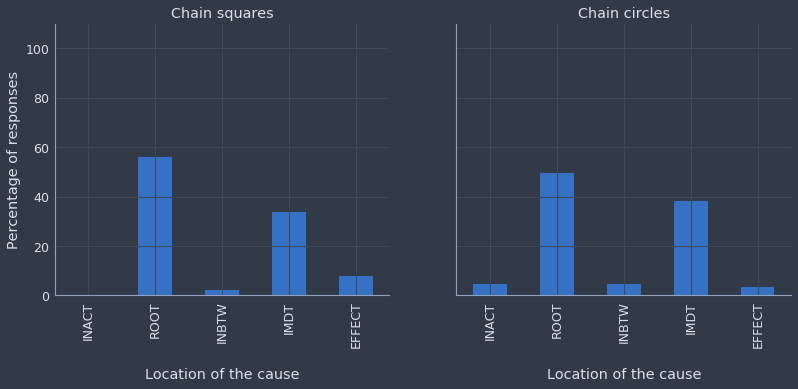

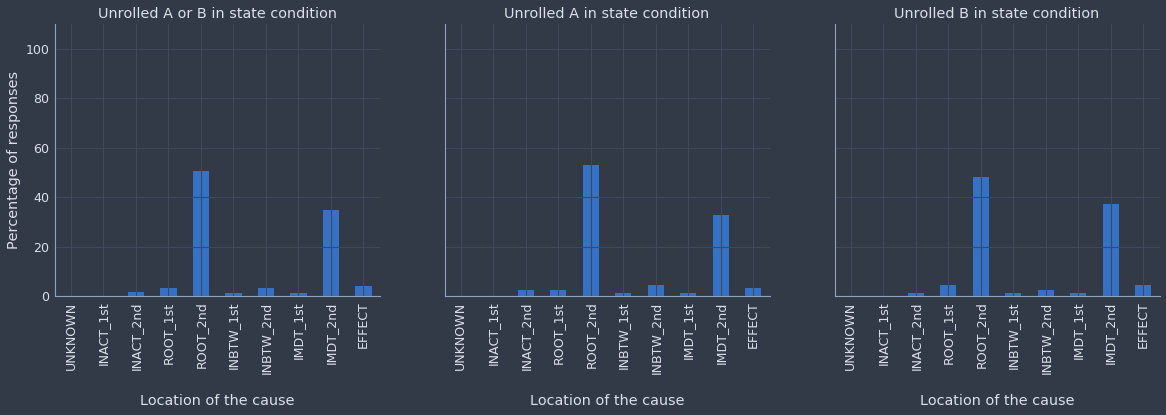

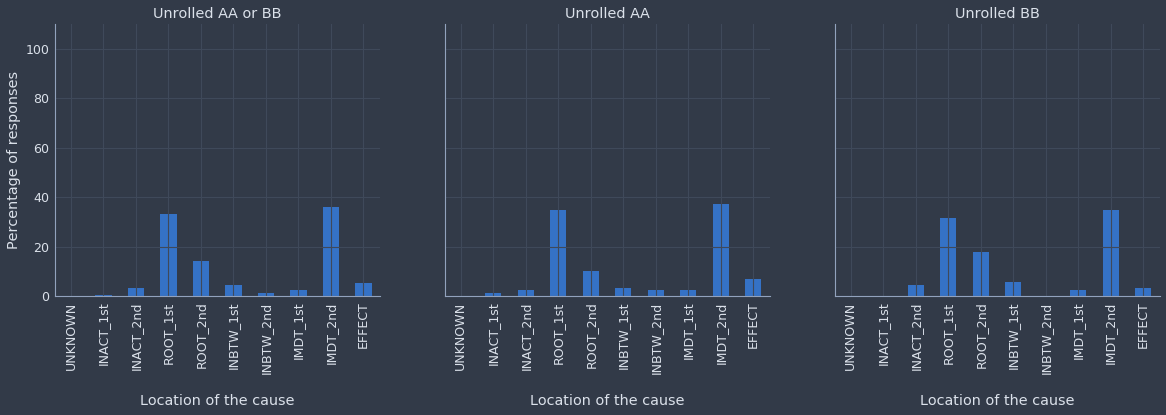

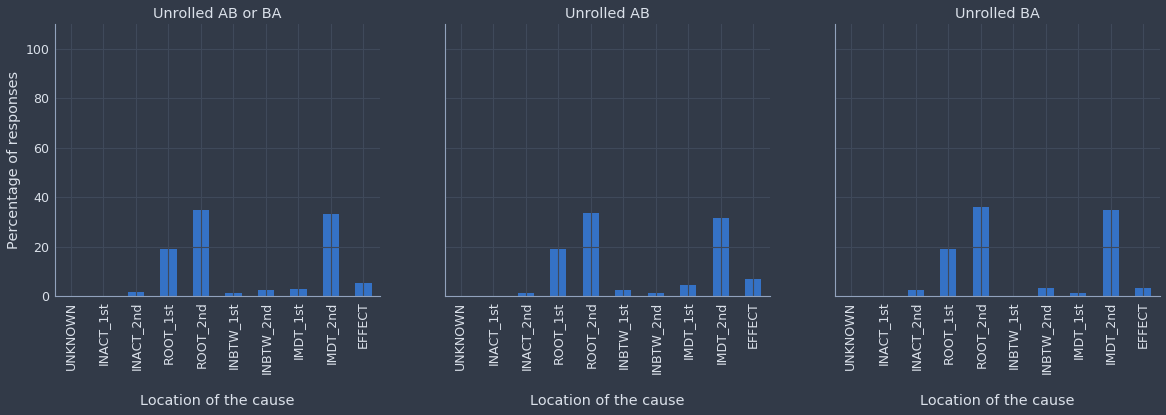

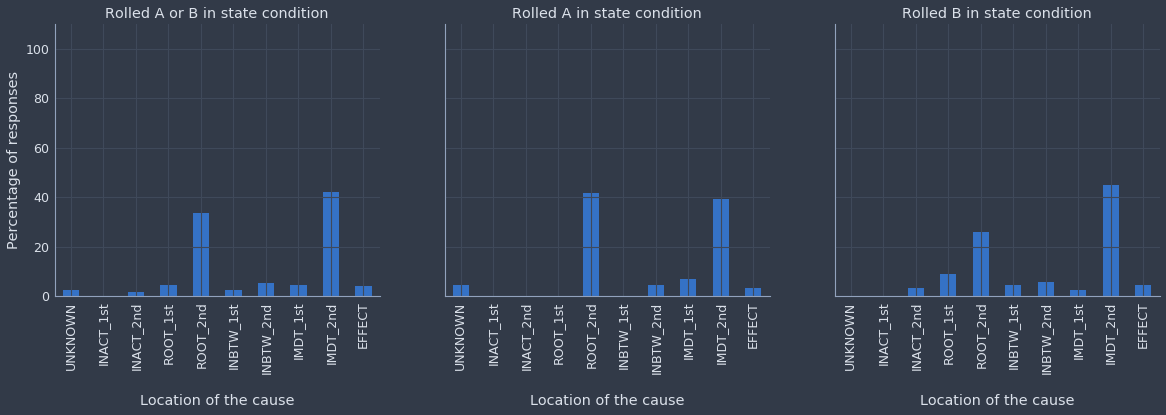

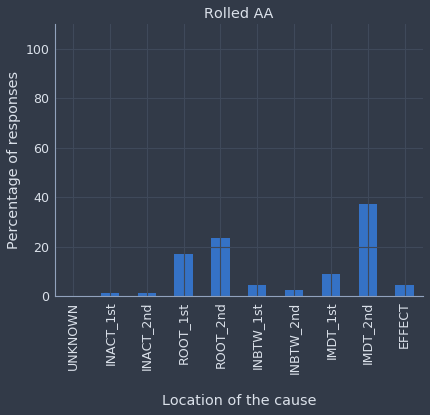

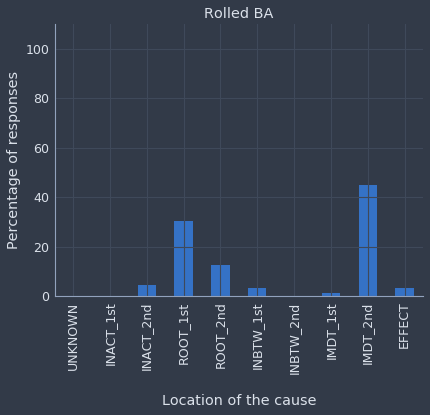

In [16]:
# For Unrolled: only graphs with SQUARES for branch A

chainS = Chain(stim='ChainS')
chainC = Chain(stim='ChainC')
UnrolledS_state = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=True)
UnrolledS_stateA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=True,state_branch='A')
UnrolledS_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=True,state_branch='B')
UnrolledS_AA_BB = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares')
UnrolledS_AA = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares',root_1st='A')
UnrolledS_BB = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares',root_1st='B')
UnrolledS_AB_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=False)
UnrolledS_AB = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=False,root_1st='A')
UnrolledS_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=False,root_1st='B')
Rolled_state = AndGate(rolled=True,continuity='root_2nd').add_filter(state=True)
Rolled_stateAA = AndGate(rolled=True,continuity='root_2nd').add_filter(state=True,state_branch='A')
Rolled_stateBA = AndGate(rolled=True,continuity='root_2nd').add_filter(state=True,state_branch='B')
Rolled_AA = AndGate(rolled=True,continuity='root_1st')
Rolled_BA = AndGate(rolled=True,continuity='root_2nd').add_filter(state=False)

graph([chainS,chainC],['Chain squares','Chain circles'])
graph([UnrolledS_state,UnrolledS_stateA,UnrolledS_stateB],['Unrolled A or B in state condition','Unrolled A in state condition','Unrolled B in state condition'])
graph([UnrolledS_AA_BB,UnrolledS_AA,UnrolledS_BB],['Unrolled AA or BB','Unrolled AA','Unrolled BB'])
graph([UnrolledS_AB_BA,UnrolledS_AB,UnrolledS_BA],['Unrolled AB or BA','Unrolled AB','Unrolled BA'])
graph([Rolled_state,Rolled_stateAA,Rolled_stateBA],['Rolled A or B in state condition','Rolled A in state condition','Rolled B in state condition'])
graph([Rolled_AA],['Rolled AA'])
graph([Rolled_BA],['Rolled BA'])

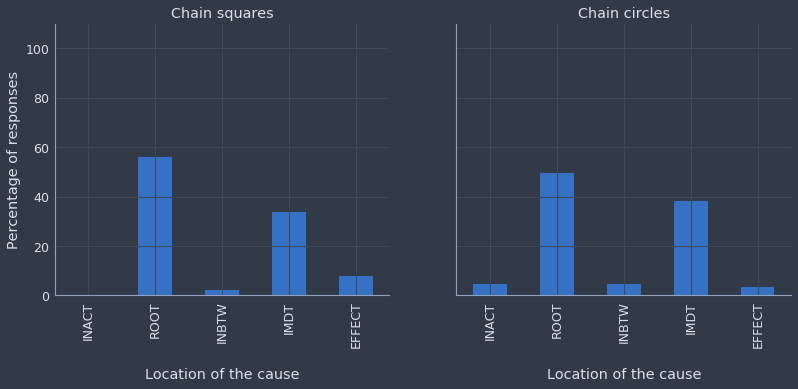

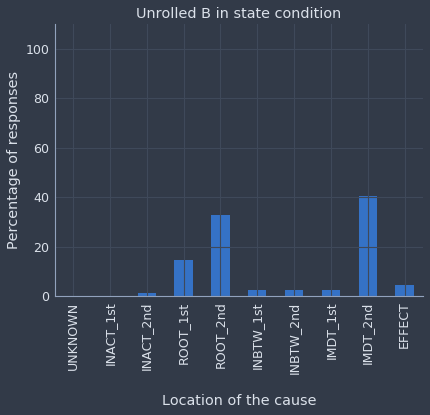

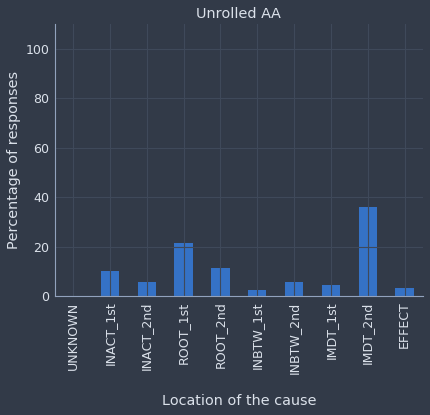

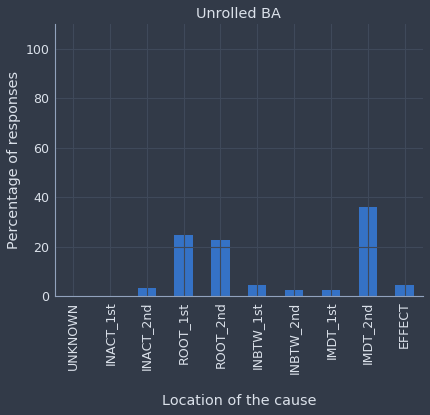

In [17]:
# For Unrolled : only graphs with CIRCLES for branch A

chainS = Chain(stim='ChainS')
chainC = Chain(stim='ChainC')
UnrolledC_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='circles',state=True,state_branch='B')
UnrolledC_AA = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='circles',root_1st='A')
UnrolledC_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='circles',state=False,root_1st='B')

graph([chainS,chainC],['Chain squares','Chain circles'])
graph([UnrolledC_stateB],['Unrolled B in state condition'])
graph([UnrolledC_AA],['Unrolled AA'])
graph([UnrolledC_BA],['Unrolled BA'])

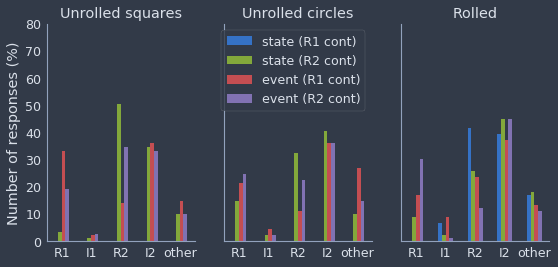

In [18]:
graph2([[UnrolledS_AA_BB,UnrolledS_AB_BA,UnrolledS_state],[UnrolledC_AA,UnrolledC_BA,UnrolledC_stateB],
        [Rolled_AA,Rolled_BA,Rolled_stateBA,Rolled_stateAA]])
plt.savefig('results_E2.png',dpi=300,bbox_inches='tight')

## Comparison Right *vs* Left

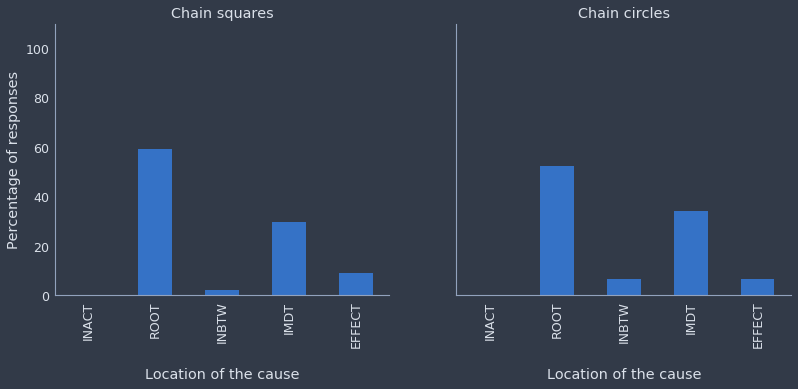

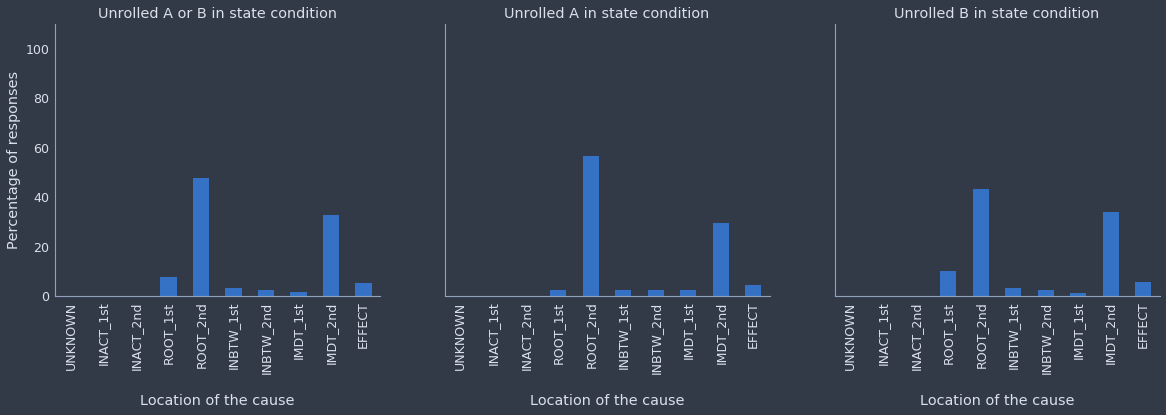

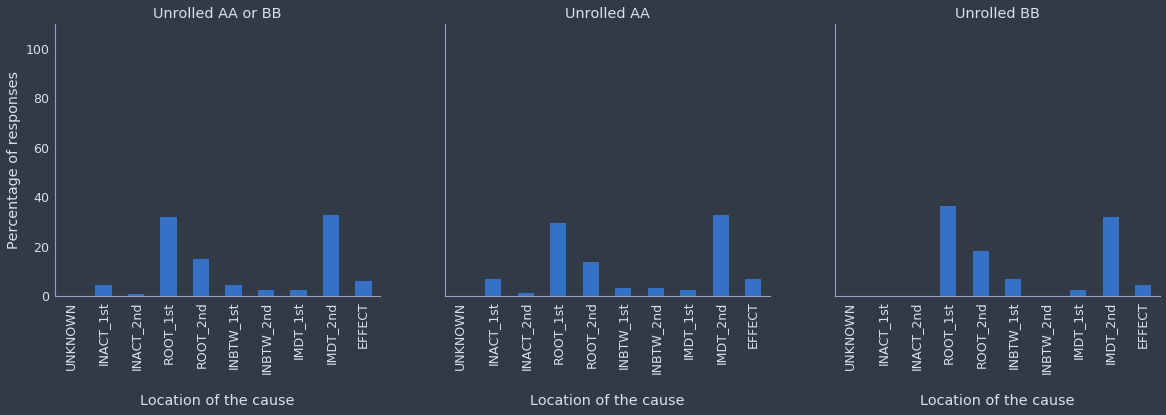

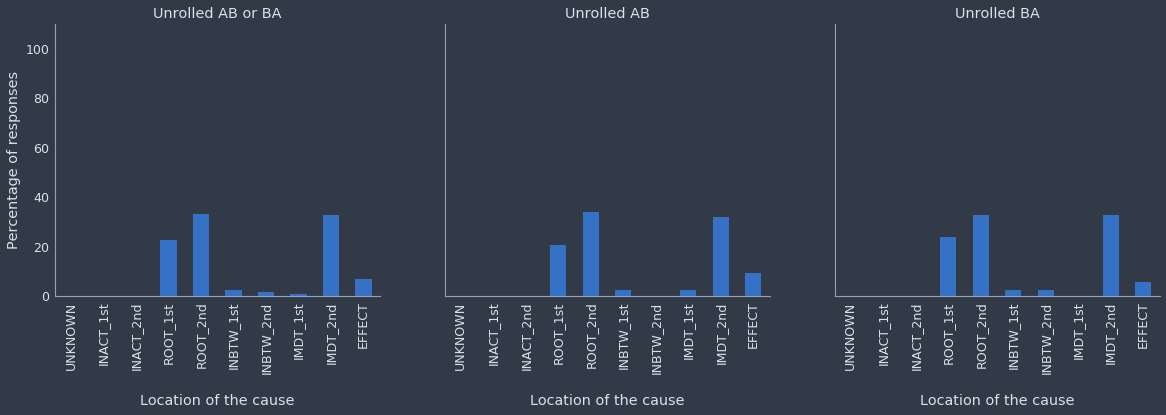

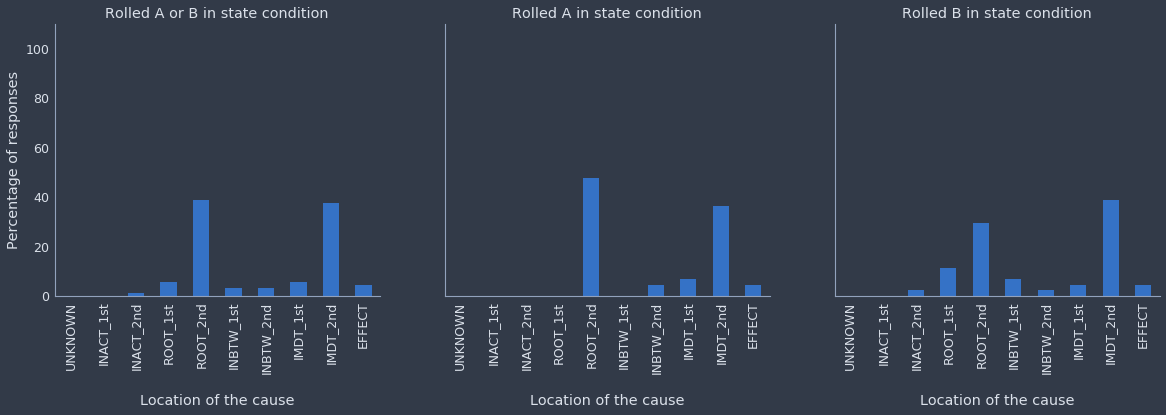

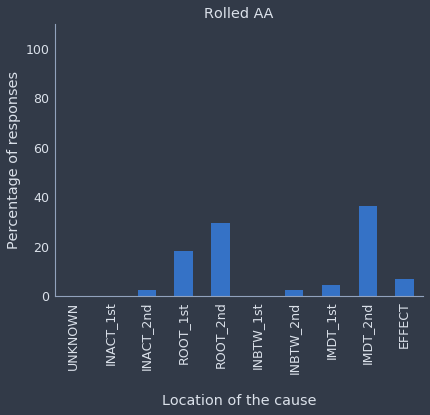

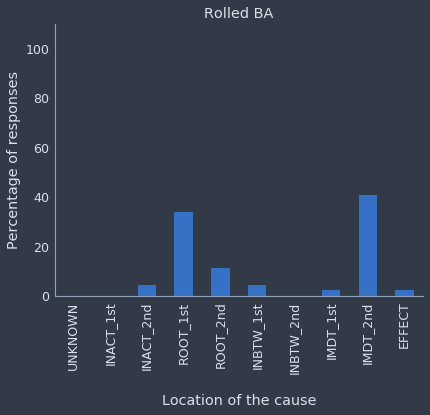

In [19]:
# Same as the general comparison BUT only for the condition 'right'

chainS = Chain(stim='ChainS').add_filter(sampling='right')
chainC = Chain(stim='ChainC').add_filter(sampling='right')
Unrolled_state = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True)
Unrolled_stateA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True,state_branch='A')
Unrolled_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True,state_branch='B')
Unrolled_AA_BB = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right')
Unrolled_AA = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right',root_1st='A')
Unrolled_BB = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right',root_1st='B')
Unrolled_AB_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False)
Unrolled_AB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False,root_1st='A')
Unrolled_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False,root_1st='B')
Rolled_state = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=True)
Rolled_stateA = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=True,state_branch='A')
Rolled_stateB = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=True,state_branch='B')
Rolled_AA = AndGate(rolled=True,continuity='root_1st').add_filter(sampling='right')
Rolled_BA = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=False)

graph([chainS,chainC],['Chain squares','Chain circles'])
graph([Unrolled_state,Unrolled_stateA,Unrolled_stateB],['Unrolled A or B in state condition','Unrolled A in state condition','Unrolled B in state condition'])
graph([Unrolled_AA_BB,Unrolled_AA,Unrolled_BB],['Unrolled AA or BB','Unrolled AA','Unrolled BB'])
graph([Unrolled_AB_BA,Unrolled_AB,Unrolled_BA],['Unrolled AB or BA','Unrolled AB','Unrolled BA'])
graph([Rolled_state,Rolled_stateA,Rolled_stateB],['Rolled A or B in state condition','Rolled A in state condition','Rolled B in state condition'])
graph([Rolled_AA],['Rolled AA'])
graph([Rolled_BA],['Rolled BA'])

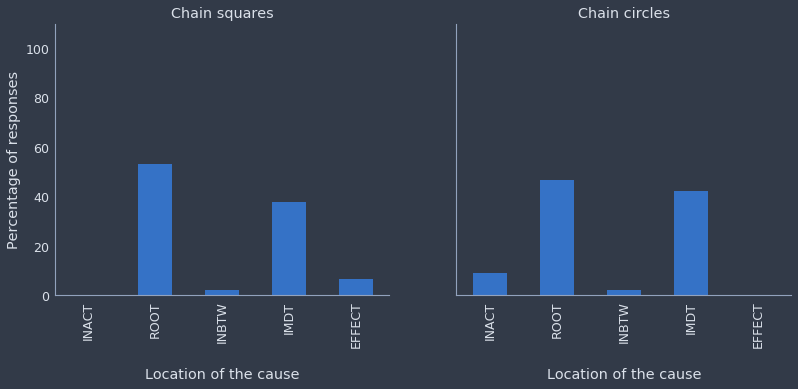

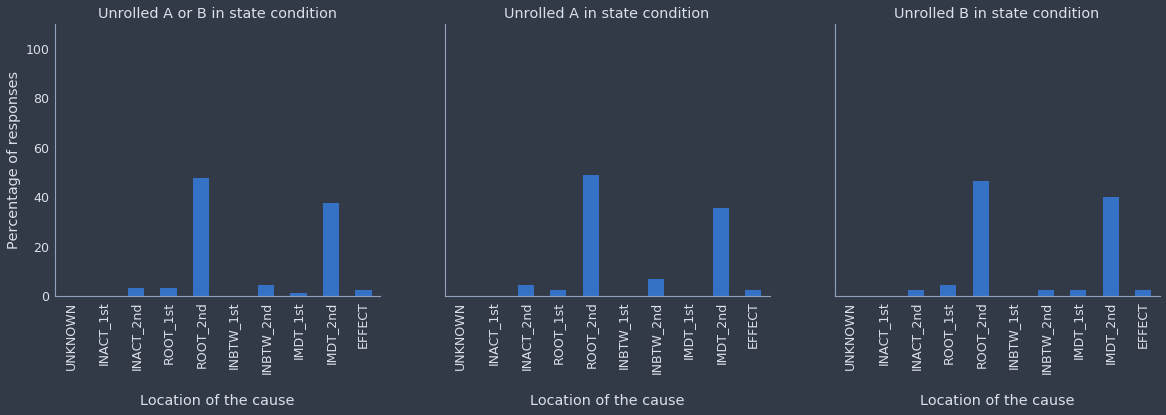

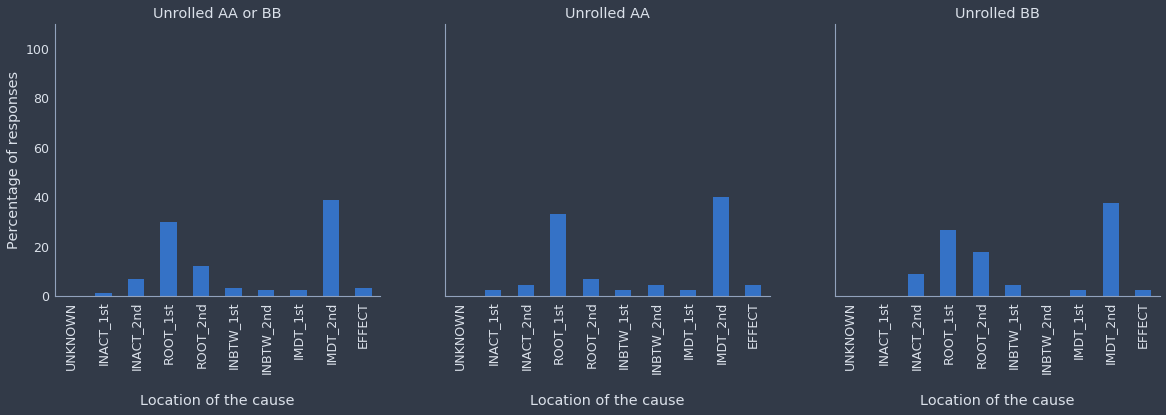

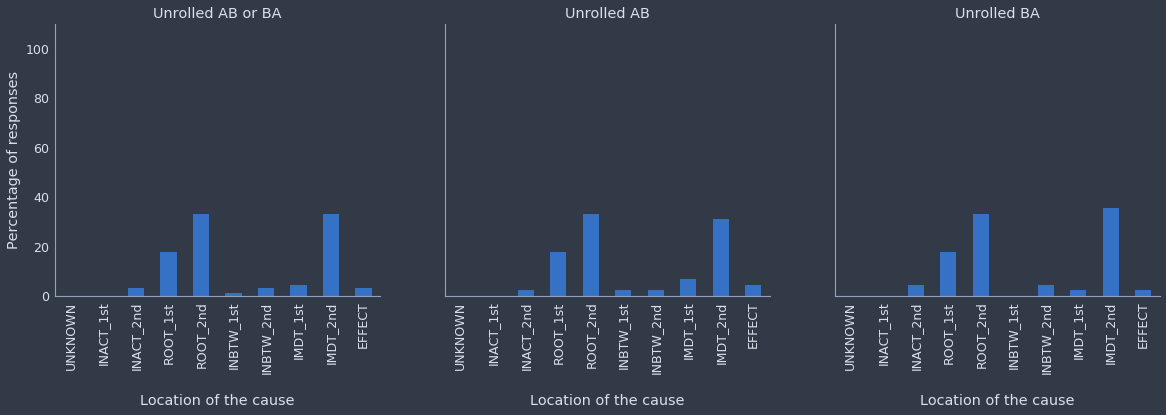

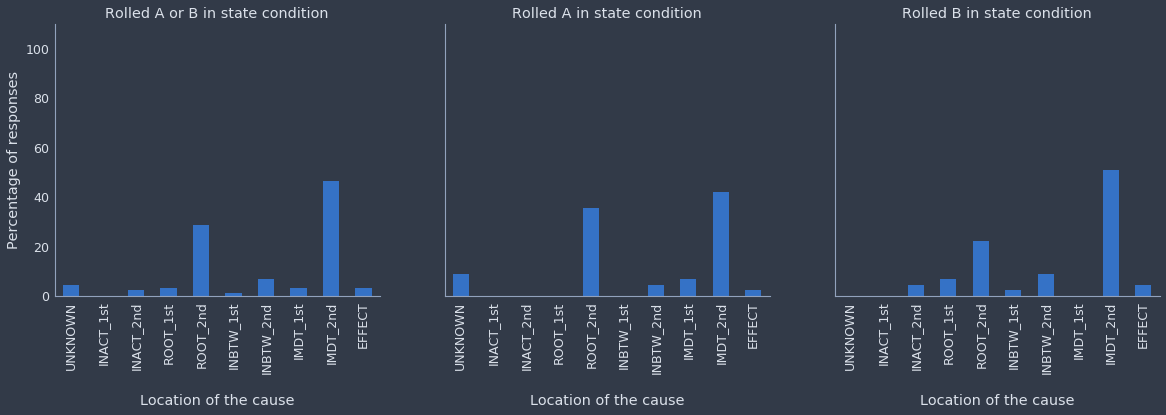

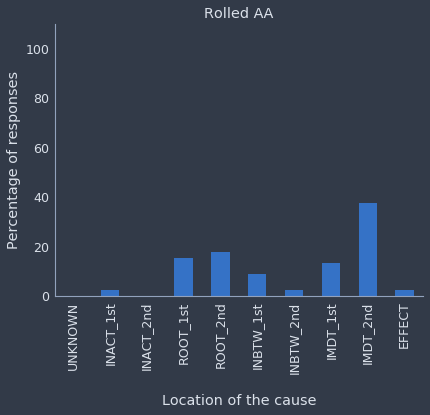

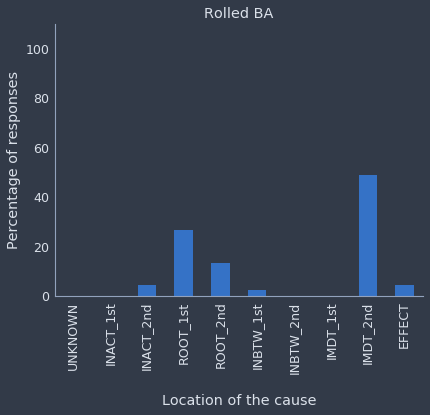

In [20]:
# Same as the general comparison BUT only for the condition 'left'

chainS = Chain(stim='ChainS').add_filter(sampling='left')
chainC = Chain(stim='ChainC').add_filter(sampling='left')
Unrolled_state = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=True)
Unrolled_stateA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=True,state_branch='A')
Unrolled_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=True,state_branch='B')
Unrolled_AA_BB = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares',sampling='left')
Unrolled_AA = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='left',A_detectors='squares',root_1st='A')
Unrolled_BB = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='left',A_detectors='squares',root_1st='B')
Unrolled_AB_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=False)
Unrolled_AB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=False,root_1st='A')
Unrolled_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=False,root_1st='B')
Rolled_state = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=True)
Rolled_stateA = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=True,state_branch='A')
Rolled_stateB = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=True,state_branch='B')
Rolled_AA = AndGate(rolled=True,continuity='root_1st').add_filter(sampling='left')
Rolled_BA = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=False)

graph([chainS,chainC],['Chain squares','Chain circles'])
graph([Unrolled_state,Unrolled_stateA,Unrolled_stateB],['Unrolled A or B in state condition','Unrolled A in state condition','Unrolled B in state condition'])
graph([Unrolled_AA_BB,Unrolled_AA,Unrolled_BB],['Unrolled AA or BB','Unrolled AA','Unrolled BB'])
graph([Unrolled_AB_BA,Unrolled_AB,Unrolled_BA],['Unrolled AB or BA','Unrolled AB','Unrolled BA'])
graph([Rolled_state,Rolled_stateA,Rolled_stateB],['Rolled A or B in state condition','Rolled A in state condition','Rolled B in state condition'])
graph([Rolled_AA],['Rolled AA'])
graph([Rolled_BA],['Rolled BA'])

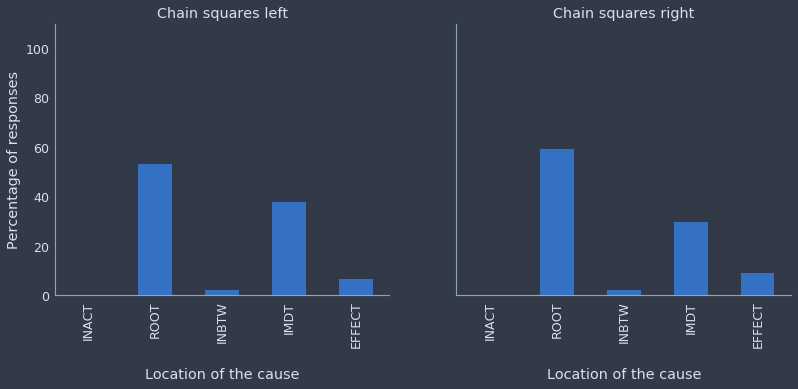

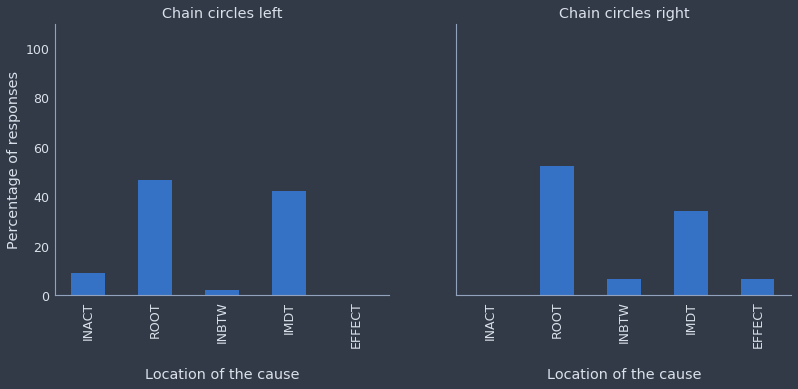

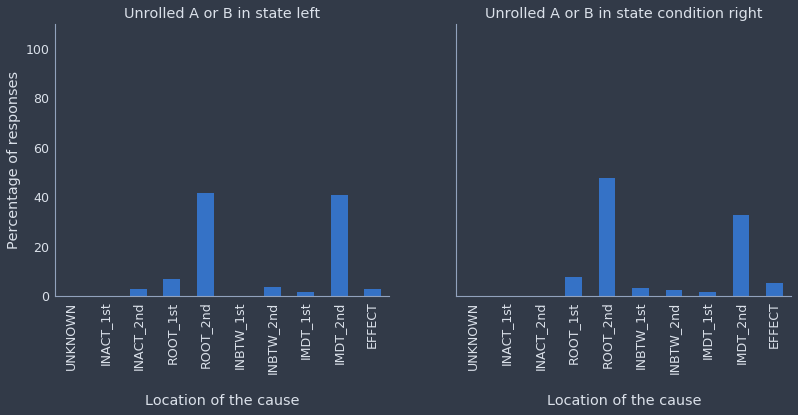

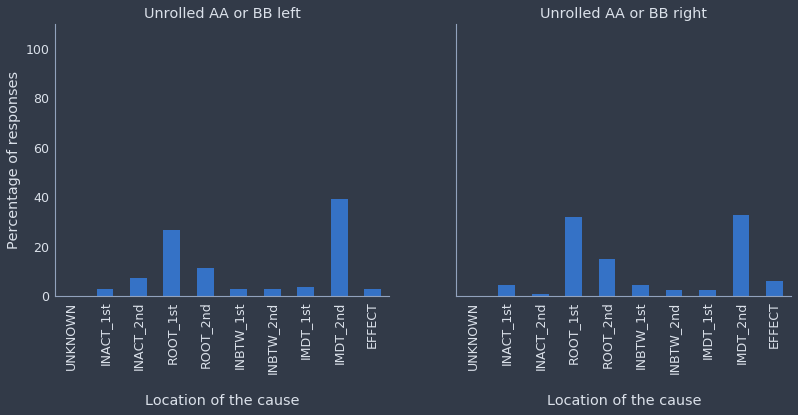

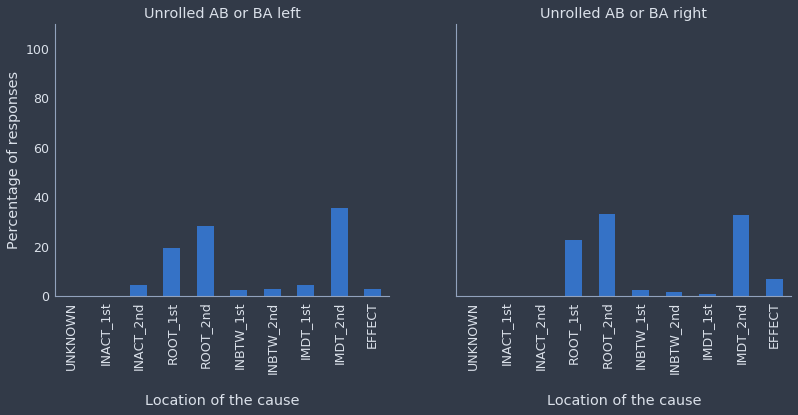

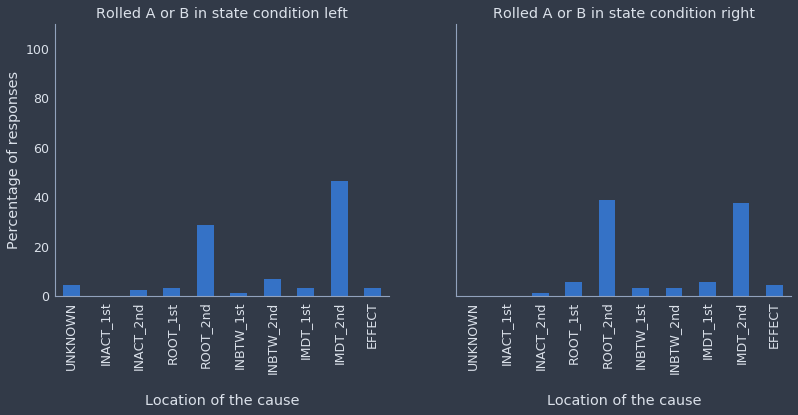

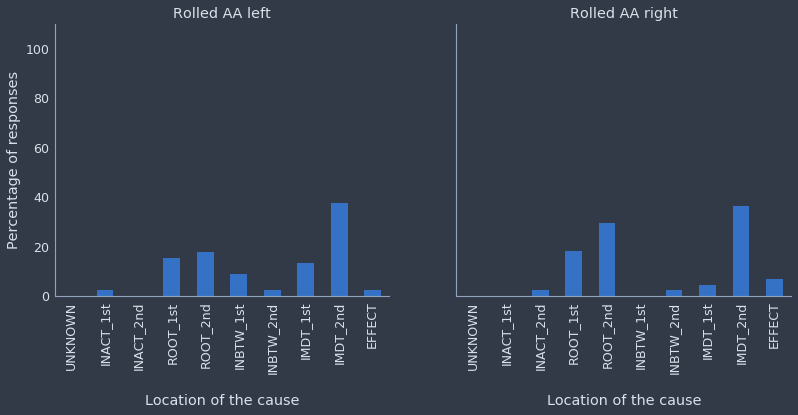

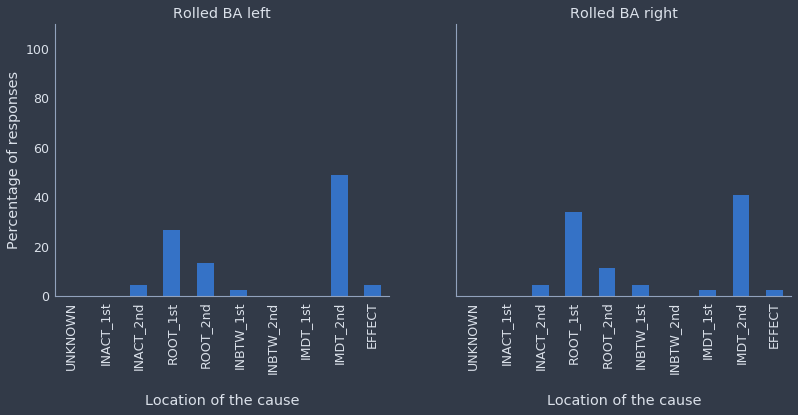

In [21]:
# Broad comparison between right vs left sampling

chainS_Right = Chain(stim='ChainS').add_filter(sampling='right')
chainS_Left = Chain(stim='ChainS').add_filter(sampling='left')
chainC_Right = Chain(stim='ChainC').add_filter(sampling='right')
chainC_Left = Chain(stim='ChainC').add_filter(sampling='left')
Unrolled_state_Right = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True)
Unrolled_state_Left = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',state=True)
Unrolled_AA_BB_Right = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right')
Unrolled_AA_BB_Left = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='left')
Unrolled_AB_BA_Right = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False)
Unrolled_AB_BA_Left = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',state=False)
Rolled_state_Right = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=True)
Rolled_state_Left = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=True)
Rolled_AA_Right = AndGate(rolled=True,continuity='root_1st').add_filter(sampling='right')
Rolled_AA_Left = AndGate(rolled=True,continuity='root_1st').add_filter(sampling='left')
Rolled_BA_Right = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='right',state=False)
Rolled_BA_Left = AndGate(rolled=True,continuity='root_2nd').add_filter(sampling='left',state=False)

graph([chainS_Left,chainS_Right],['Chain squares left','Chain squares right'])
graph([chainC_Left,chainC_Right],['Chain circles left','Chain circles right'])
graph([Unrolled_state_Left,Unrolled_state_Right],['Unrolled A or B in state left','Unrolled A or B in state condition right'])
graph([Unrolled_AA_BB_Left,Unrolled_AA_BB_Right],['Unrolled AA or BB left','Unrolled AA or BB right'])
graph([Unrolled_AB_BA_Left,Unrolled_AB_BA_Right],['Unrolled AB or BA left','Unrolled AB or BA right'])
graph([Rolled_state_Left,Rolled_state_Right],['Rolled A or B in state condition left','Rolled A or B in state condition right'])
graph([Rolled_AA_Left,Rolled_AA_Right],['Rolled AA left','Rolled AA right'])
graph([Rolled_BA_Left,Rolled_BA_Right],['Rolled BA left','Rolled BA right'])

## Comparison Top *vs* Bottom

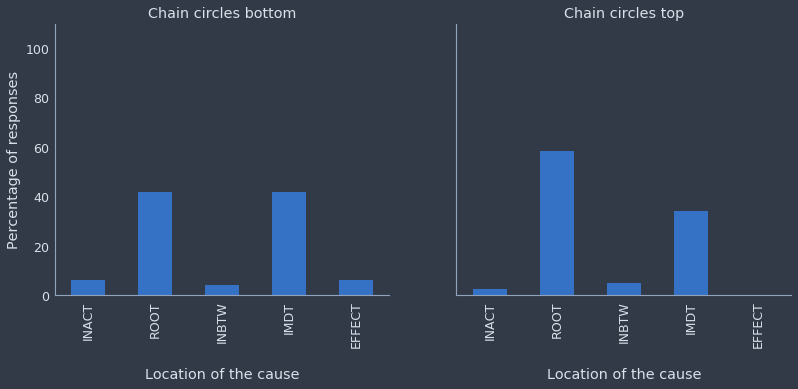

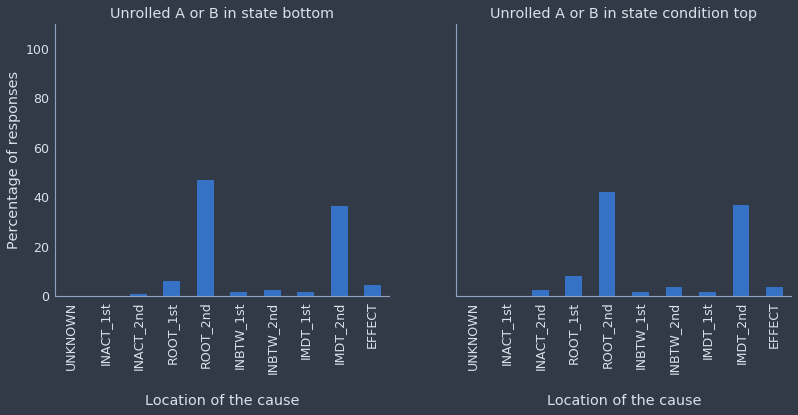

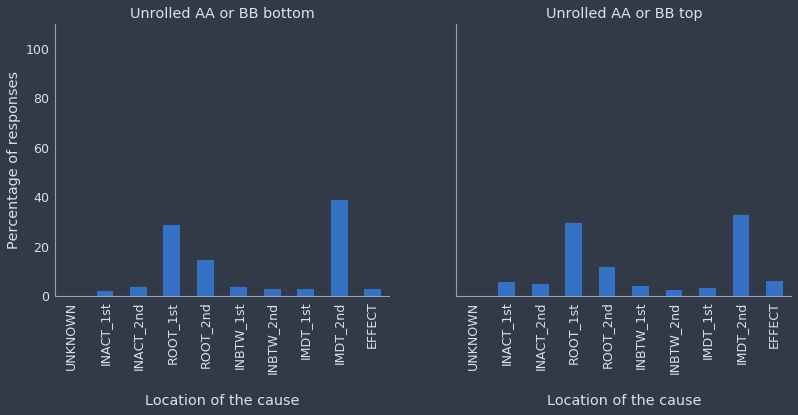

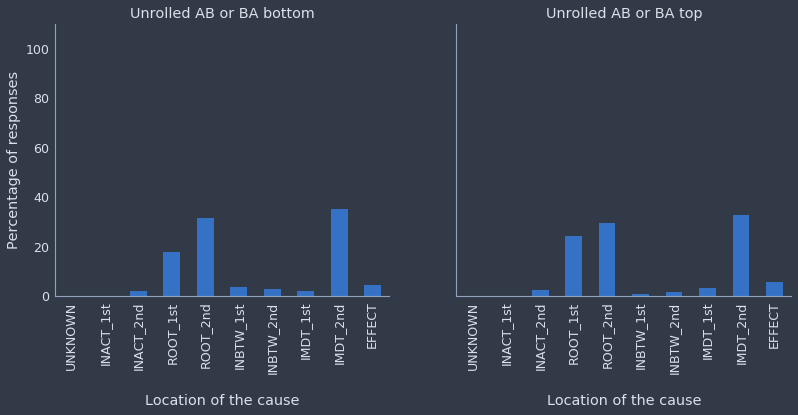

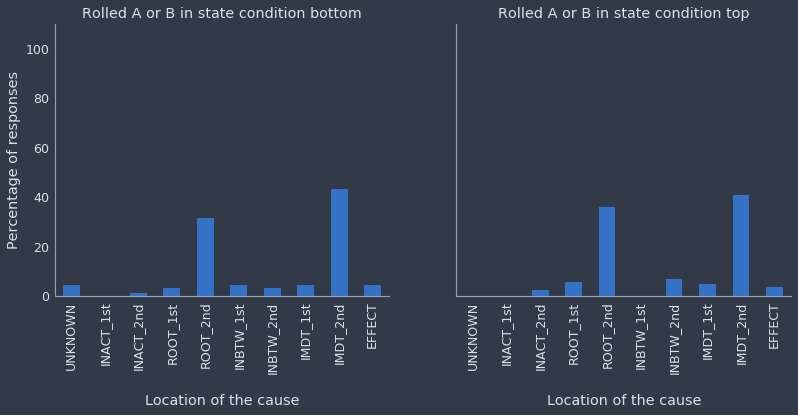

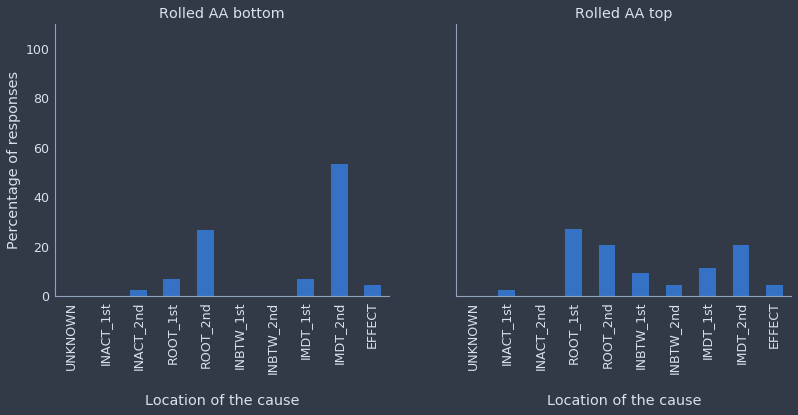

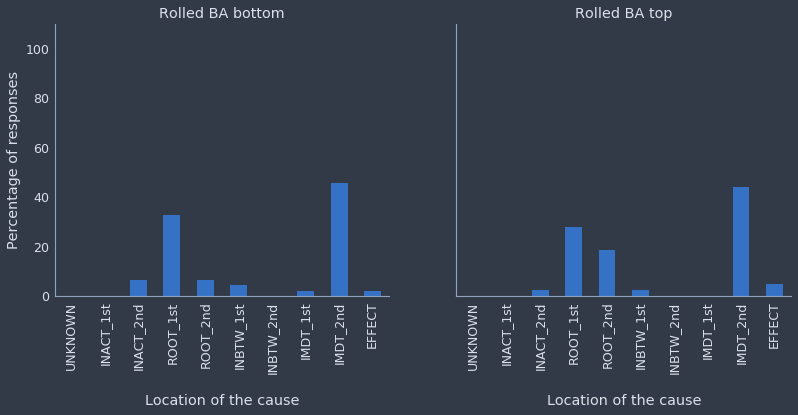

In [22]:
# Broad comparison between TOP vs BOTTOM location of branch A

chainC_Top = Chain(stim='ChainC').add_filter(level='top')
chainC_Bottom = Chain(stim='ChainC').add_filter(level='bottom')
Unrolled_state_Top = AndGate(rolled=False,continuity='root_2nd').add_filter(level='top',state=True)
Unrolled_state_Bottom = AndGate(rolled=False,continuity='root_2nd').add_filter(level='bottom',state=True)
Unrolled_AA_BB_Top = AndGate(rolled=False,continuity='root_1st').add_filter(level='top')
Unrolled_AA_BB_Bottom = AndGate(rolled=False,continuity='root_1st').add_filter(level='bottom')
Unrolled_AB_BA_Top = AndGate(rolled=False,continuity='root_2nd').add_filter(level='top',state=False)
Unrolled_AB_BA_Bottom = AndGate(rolled=False,continuity='root_2nd').add_filter(level='bottom',state=False)
Rolled_state_Top = AndGate(rolled=True,continuity='root_2nd').add_filter(level='top',state=True)
Rolled_state_Bottom = AndGate(rolled=True,continuity='root_2nd').add_filter(level='bottom',state=True)
Rolled_AA_Top = AndGate(rolled=True,continuity='root_1st').add_filter(level='top')
Rolled_AA_Bottom = AndGate(rolled=True,continuity='root_1st').add_filter(level='bottom')
Rolled_BA_Top = AndGate(rolled=True,continuity='root_2nd').add_filter(level='top',state=False)
Rolled_BA_Bottom = AndGate(rolled=True,continuity='root_2nd').add_filter(level='bottom',state=False)

graph([chainC_Bottom,chainC_Top],['Chain circles bottom','Chain circles top'])
graph([Unrolled_state_Bottom,Unrolled_state_Top],['Unrolled A or B in state bottom','Unrolled A or B in state condition top'])
graph([Unrolled_AA_BB_Bottom,Unrolled_AA_BB_Top],['Unrolled AA or BB bottom','Unrolled AA or BB top'])
graph([Unrolled_AB_BA_Bottom,Unrolled_AB_BA_Top],['Unrolled AB or BA bottom','Unrolled AB or BA top'])
graph([Rolled_state_Bottom,Rolled_state_Top],['Rolled A or B in state condition bottom','Rolled A or B in state condition top'])
graph([Rolled_AA_Bottom,Rolled_AA_Top],['Rolled AA bottom','Rolled AA top'])
graph([Rolled_BA_Bottom,Rolled_BA_Top],['Rolled BA bottom','Rolled BA top'])